In [1]:
from skimage import data
from skimage.exposure import histogram
from skimage import io
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi

In [27]:
ds=io.imread('C:/Users/Django/Downloads/a.png')

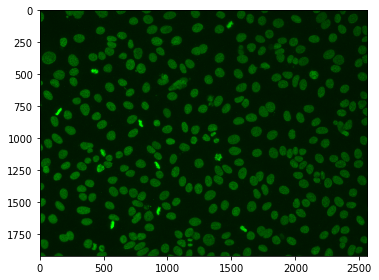

In [3]:
io.imshow(ds)

In [9]:
from skimage import data
from skimage.exposure import histogram
hist, hist_centers = histogram(db)

In [10]:
image= cv2.imread('C:/Users/Django/Downloads/a.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [8]:
db=io.imread('C:/Users/Django/grayac.jpg')

In [11]:
 from skimage.feature import canny
 edges = canny(db/255.)

In [11]:
cv2.imwrite('grayac.jpg',gray)

True

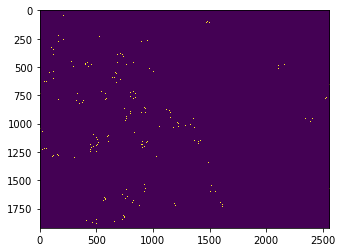

In [12]:
plt.imshow(edges)

In [13]:
from skimage.filters import sobel
elevation_map = sobel(db)

In [14]:
io.imsave('sobel.png',elevation_map, cmap= plt.cm.gray )

C:\Users\Django\Anaconda3\lib\site-packages\skimage\io\_io.py:140: UserWarning: sobel.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\Django\Anaconda3\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


C:\Users\Django\Anaconda3\lib\site-packages\skimage\io\_io.py:140: UserWarning: celledgesbl.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\Django\Anaconda3\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


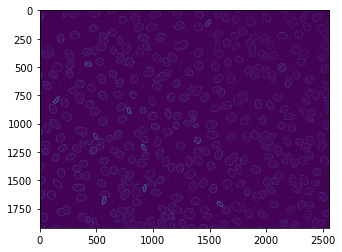

In [15]:
plt.imshow(elevation_map)


In [19]:
markers = np.zeros_like(db)
markers[db < 30] = 1
markers[db > 100] = 2

In [20]:
from skimage.morphology import watershed
segmentation = watershed(elevation_map, markers)


C:\Users\Django\Anaconda3\lib\site-packages\skimage\util\arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


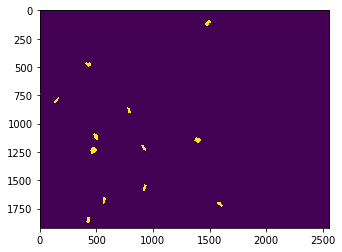

In [35]:
plt.imshow(segmentation)

In [20]:
io.imsave('cellsegementaed.png', segmentation)

C:\Users\Django\Anaconda3\lib\site-packages\skimage\io\_io.py:140: UserWarning: cellsegementaed.png is a low contrast image
  warn('%s is a low contrast image' % fname)


In [8]:
g = io.imread('C:/Users/Django/cellsegementaed.png')

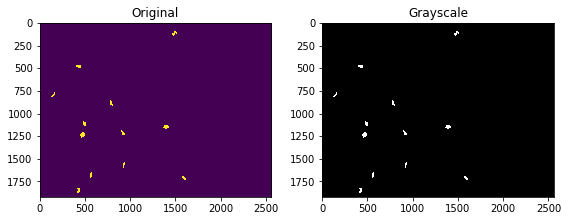

In [9]:
from skimage import data
from skimage.color import rgb2gray

grayscale = rgb2gray(g)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(g)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

C:\Users\Django\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


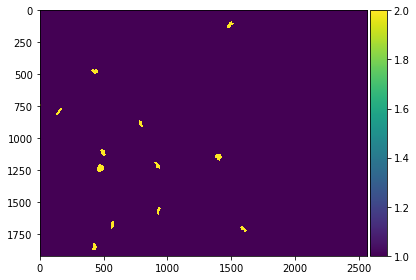

In [10]:
io.imshow(g)

In [12]:
from skimage import util 
img = g
inverted_img = util.invert(img)

C:\Users\Django\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
C:\Users\Django\Anaconda3\lib\site-packages\skimage\io\_io.py:140: UserWarning: insverted.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


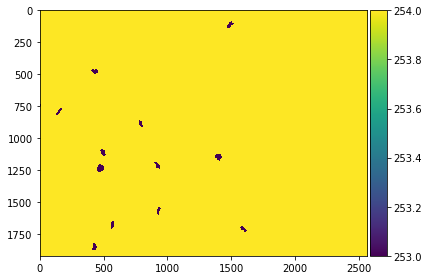

In [13]:
io.imshow(inverted_img)
io.imsave('insverted.tif', inverted_img)

In [15]:
segmentation = ndi.binary_fill_holes(segmentation - 1)

NameError: name 'segmentation' is not defined

In [32]:
>>> labeled_db= ndi.label(segmentation)

In [37]:
>>> labeled_coins, _ = ndi.label(segmentation)

Text(0.5, 1.0, 'histogram of gray values')

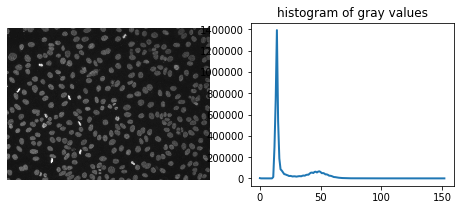

In [41]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.exposure import histogram

#coins = data.coins()
hist, hist_centers = histogram(db)

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(db, cmap=plt.cm.gray, interpolation='nearest')
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')

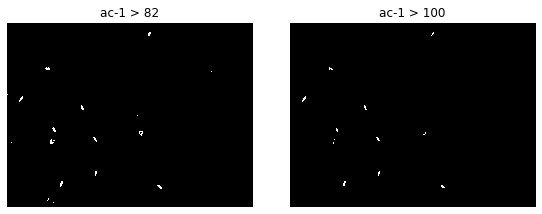

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

axes[0].imshow(db > 82, cmap=plt.cm.gray, interpolation='nearest')
axes[0].set_title('ac-1 > 82')

axes[1].imshow(db > 100, cmap=plt.cm.gray, interpolation='nearest')
axes[1].set_title('ac-1 > 100')

for a in axes:
    a.axis('off')

plt.tight_layout()

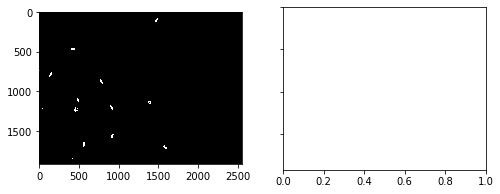

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(db > 82, cmap=plt.cm.gray, interpolation='nearest')

In [34]:
plt.imsave('test.png', segmentation, cmap = plt.cm.gray)

In [16]:
inv_sobel=cv2.imread('C:/Users/Django/sobel.png')

In [21]:
inv=cv2.bitwise_not(inv_sobel)

In [24]:
io.imsave('inv_sobel.png', inv , cmap = plt.cm.gray)

C:\Users\Django\Anaconda3\lib\site-packages\skimage\io\_io.py:140: UserWarning: inv_sobel.png is a low contrast image
  warn('%s is a low contrast image' % fname)


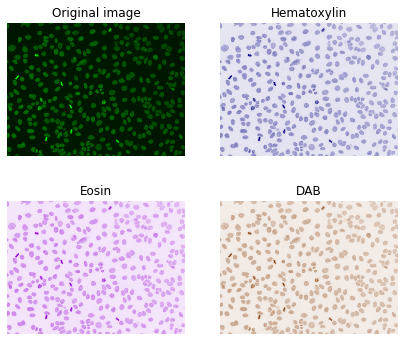

In [29]:
#COLOR staining in cell image 
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hed
from matplotlib.colors import LinearSegmentedColormap

# Create an artificial color close to the original one
cmap_hema = LinearSegmentedColormap.from_list('mycmap', ['white', 'navy'])
cmap_dab = LinearSegmentedColormap.from_list('mycmap', ['white',
                                             'saddlebrown'])
cmap_eosin = LinearSegmentedColormap.from_list('mycmap', ['darkviolet',
                                               'white'])

ihc_rgb = ds
ihc_hed = rgb2hed(ihc_rgb)

fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_hed[:, :, 0], cmap=cmap_hema)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_hed[:, :, 1], cmap=cmap_eosin)
ax[2].set_title("Eosin")

ax[3].imshow(ihc_hed[:, :, 2], cmap=cmap_dab)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')



In [31]:
io.imsave('dabtx.png',ihc_hed, cmap= cmap_dab )

C:\Users\Django\Anaconda3\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


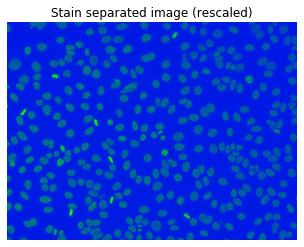

In [36]:
import numpy as np
from skimage.exposure import rescale_intensity

# Rescale hematoxylin and DAB signals and give them a fluorescence look
h = rescale_intensity(ihc_hed[:, :, 1], out_range=(0, 1))
d = rescale_intensity(ihc_hed[:, :, 2], out_range=(0, 1))
zdh = np.dstack((np.zeros_like(h), d, h))

fig = plt.figure()
axis = plt.subplot(1, 1, 1, sharex=ax[0], sharey=ax[0])
axis.imshow(zdh)
axis.set_title("Stain separated image (rescaled)")
axis.axis('off')
plt.show()

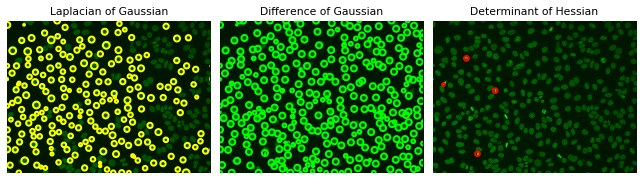

In [43]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt


image = ds
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()